In [2]:
#DECLARAÇÃO DE BIBLIOTECAS

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#GERAÇÃO DE DADOS

np.random.seed(42) #reset do gerador randomico sempre pro mesmo ponto

M = 100 # número de exemplos
x = 6*np.random.rand(M,1) - 3 # distribuição aleatoria entre -3 e 3
n = np.random.randn(M,1) # distribuição gaussiana de media 0 e variancia 1 

y = 2 + x + 0.5*x**2 + x**3 # y original
y_n = y + n # y ruidoso

In [57]:
# GERAÇÃO DOS CONJUNTOS DE TREINAMENTO E VALIDAÇÃO

x_t, x_v, y_t, y_v = train_test_split(x, y_n, test_size=0.7, random_state=42) # gera os conjuntos de treinamento e validação (random state em 42 deixa reprodutivel a divisão)

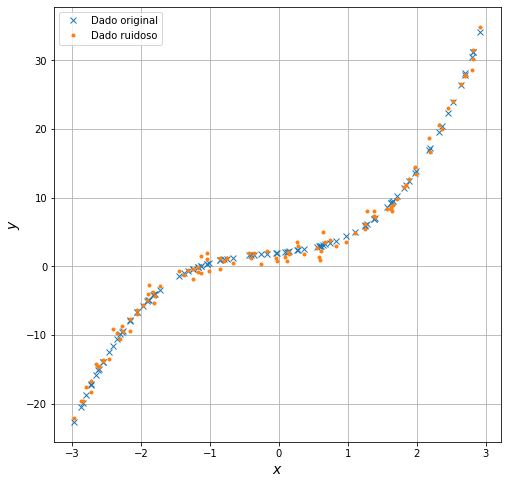

<Figure size 432x288 with 0 Axes>

In [58]:
#PLOT GRAFICO DADOS ORIGINAIS E COM RUIDO

fig = plt.figure(figsize=(8,8))
plt.plot(x, y, 'x', label='Dado original')
plt.plot(x, y_n, '.', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

plt.savefig('DADO ORIGINAL x DADO RUIDOSO EXERCICIO 3', dpi = 600)

In [59]:
#CONCATENAR VETORES DE TREINAMENTO E VALIDAÇÃO

grau_modelo = 30

X_t = np.ones((len(y_t),1))
for i in range(1, grau_modelo+1):
    X_t = np.c_[X_t, np.power(x_t, i)]
    
X_v = np.ones((len(y_v),1))
for i in range(1, grau_modelo+1):
    X_v = np.c_[X_v, np.power(x_v, i)]
    

In [63]:
#REALIZAR PADRONIZACAO

scaler = StandardScaler()
X_t = np.c_[np.ones((len(y_t),1)), scaler.fit_transform(X_t[:,1:])]
X_v = np.c_[np.ones((len(y_v),1)), scaler.transform(X_v[:,1:])]

In [66]:
#GRADIENTE DESCENDENTE EM BATELADA

n_iteracoes = 1000
passo = 0.05

erro_t = np.zeros(n_iteracoes+1)
erro_v = np.zeros(n_iteracoes+1)

erro_minimo = float("inf")
melhor_iteracao = None
melhor_modelo = None

a = np.random.randn(grau_modelo+1, 1) # inicializar pesos

erro_t[0] = (1/M)*sum(np.power((y_t - X_t.dot(a)), 2))
    
erro_v[0] = (1/M)*sum(np.power((y_v - X_v.dot(a)), 2))

iteration = 0
error = 1

while iteration < n_iteracoes:
    gradients = (-2/len(y_t))*X_t.T.dot(y_t - X_t.dot(a))
    a = a - passo * gradients
    erro_t[iteration+1] = (1/len(y_t))*sum(np.power((y_t - X_t.dot(a)), 2))
    error = np.abs(erro_t[iteration+1] - erro_t[iteration])
    erro_v[iteration+1] = (1/len(y_v))*sum(np.power((y_v - X_v.dot(a)), 2))
    if erro_v[iteration+1] < erro_minimo:
        erro_minimo = erro_v[iteration+1]
        melhor_iteracao = iteration
        melhor_modelo = a
        
    iteration = iteration + 1
    
print('MELHOR ITERACAO:',melhor_iteracao)
print('ERRO MINIMO:',erro_minimo)

MELHOR ITERACAO: 0
ERRO MINIMO: 775.204172774662


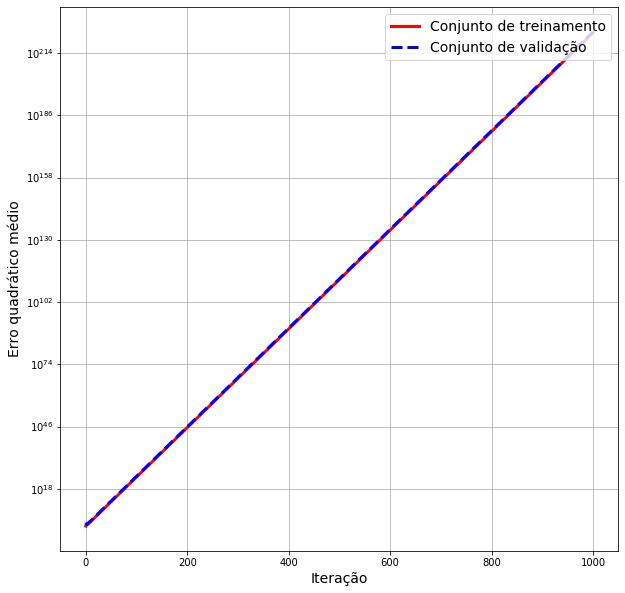

<Figure size 432x288 with 0 Axes>

In [65]:
#PLOT GRAFICOS ERRO DE TREINAMENTO E VALIDACAO x LAMBDA

fig = plt.figure(figsize=(10,10))

plt.plot(range(0, n_iteracoes + 1), erro_t, "r-", linewidth=3, label="Conjunto de treinamento")
plt.plot(range(0, n_iteracoes + 1), erro_v, "b--", linewidth=3, label="Conjunto de validação")
plt.legend(loc="upper right", fontsize=14)
plt.yscale('log')
plt.xlabel('Iteração', fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
plt.show()

plt.savefig('ERROS TREINAMENTO E VALIDACAO x ITERACOES EXERCICIO 3', dpi = 600)

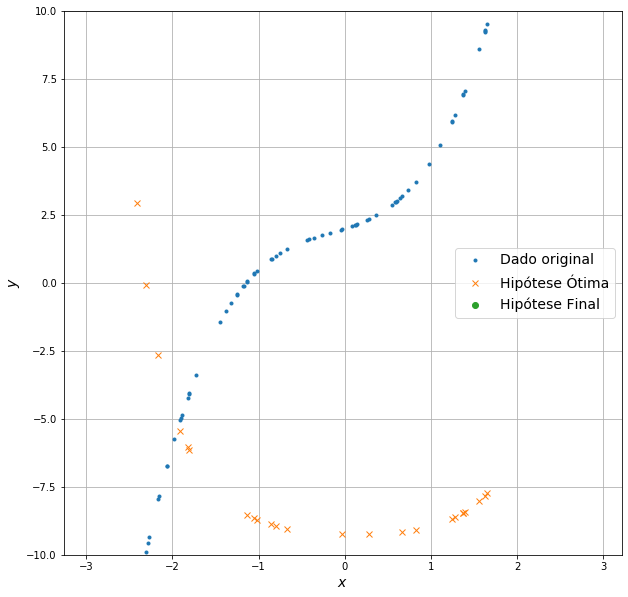

<Figure size 432x288 with 0 Axes>

In [41]:
#PLOT DA COMPARAÇÃO MELHOR MODELO COM O REAL

fig = plt.figure(figsize=(10,10))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x_t, X_t.dot(melhor_modelo), 'x', label='Hipótese Ótima')
plt.plot(x_t, X_t.dot(a), 'o', label='Hipótese Final')
plt.ylim([-10, 10])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

plt.savefig('MELHOR MODELO x ORIGINAL EXERCICIO 3', dpi = 600)